In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import random

#### Generate 100000 numbers from 0 to 10

In [2]:
uniform_data = stats.uniform.rvs(size=100000, loc = 0, scale=10)

#### Plot the distribution

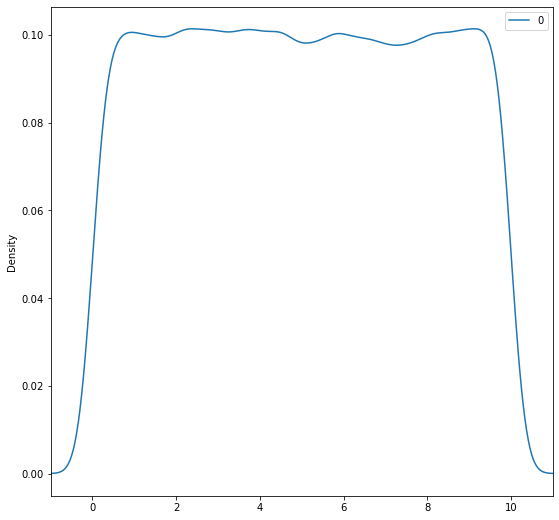

In [3]:
pd.DataFrame(uniform_data).plot(kind="density", figsize=(9,9), xlim=(-1,11));

#### Cutoff value (quantile) to check, Distribution start, Distribution end

In [4]:
stats.uniform.cdf(x=2.5, loc=0, scale=10) 

0.25

#### Probability cutoff, Distribution start, Distribution end

In [5]:
stats.uniform.ppf(q=0.4, loc=0, scale=10) 

4.0

In [6]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


In [7]:
random.randint(0,10) 

2

In [8]:
random.choice([2,4,6,9])

2

In [9]:
random.random() 

0.8083181458423003

In [10]:
random.uniform(0,10)

0.1178025593459675

In [11]:
random.seed(12) # Set the seed to an arbitrary value
print([random.uniform(0,10) for x in range(4)])
random.seed(12) # Set the seed to the same value
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


In [12]:
prob_under_minus1 = stats.norm.cdf(x= -1,
loc = 0,
scale= 1)
prob_over_1 = 1 - stats.norm.cdf(x= 1,
loc = 0,
scale= 1)
between_prob = 1-(prob_under_minus1+prob_over_1)
print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


#### Plot normal distribution areas

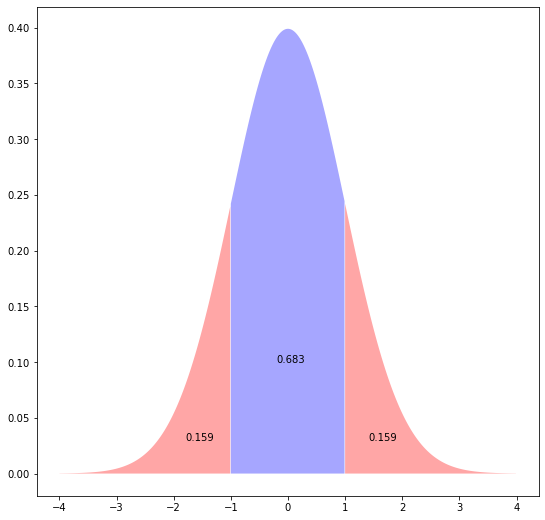

In [13]:
plt.rcParams["figure.figsize"] = (9,9)
plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)
plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)
plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)
plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

In [14]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff
print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


#### Number of flips per trial, Success probability, Number of trials

col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts  12  102  414  1145  2068  2524  2034  1150  434  108   9


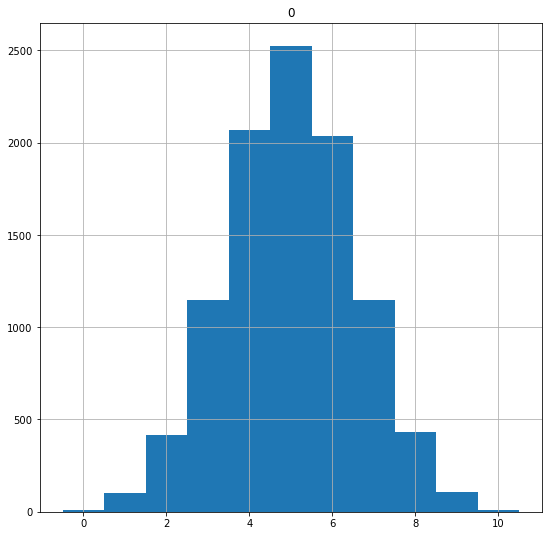

In [15]:
fair_coin_flips = stats.binom.rvs(n=10, p=0.5, size=10000) 
print( pd.crosstab(index="counts", columns= fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

#### Number of flips per trial, Success probability, Number of trials

In [16]:
biased_coin_flips = stats.binom.rvs(n=10, p=0.8, size=10000) 

#### Print table of counts

In [17]:
print( pd.crosstab(index="counts", columns= biased_coin_flips))

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  10  40  274  893  2031  3059  2640  1053


#### Plot histogram

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

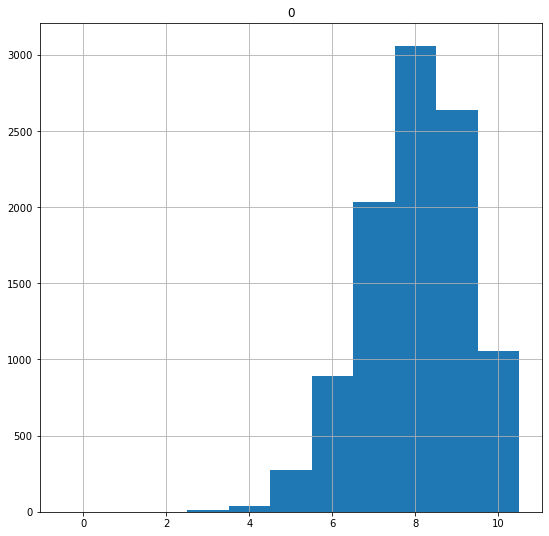

In [18]:
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

#### Probability of k = 5 successes or less with 10 flips and success probability 0.8

In [19]:
stats.binom.cdf(k=5, n=10, p=0.8)

0.032793497599999964

#### Probability of k = 9 successes or more with 10 flips and success probability 0.8

In [20]:
1 - stats.binom.cdf(k=8, n=10, p=0.8) 

0.37580963840000003

#### Probability of k = 5 successes with 10 flips and success probability 0.5

In [21]:
stats.binom.pmf(k=5, n=10, p=0.5)

0.24609375000000025

#### Probability of k = 8 successes with 10 flips and success probability 0.8

In [22]:
stats.binom.pmf(k=8, n=10, p=0.8)

0.301989888

#### Generate geometric data with success prob 0.5

In [23]:
random.seed(12)
flips_till_heads = stats.geom.rvs(size=10000, p=0.5)  

#### Print table of counts

In [24]:
print( pd.crosstab(index="counts", columns= flips_till_heads))

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  17
row_0                                                                      
counts  5007  2516  1216  660  286  173  77  34  14   7   6   1   1   1   1


#### Plot histogram

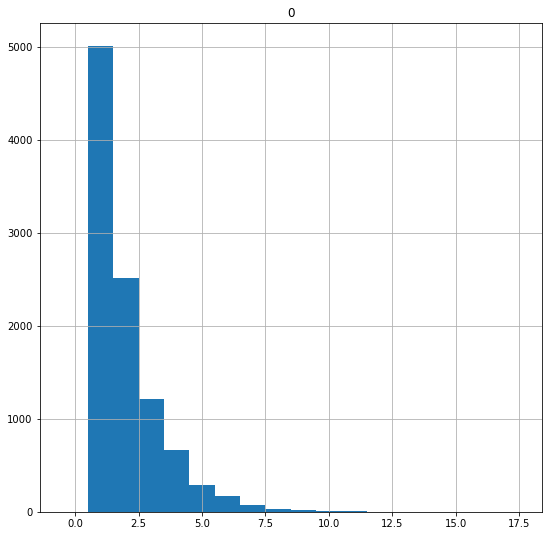

In [25]:
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5), bins=max(flips_till_heads)+1);

#### Prob of success in first 5 flips

In [26]:
first_five = stats.geom.cdf(k=5, p=0.5)
1 - first_five

0.03125

#### Prob of needing exactly 2 flips to get first success

In [27]:
stats.geom.pmf(k=2, p=0.5)

0.25

#### Get the probability of waiting more than 1 time unit before a success

In [28]:
prob_1 = stats.expon.cdf(x=1, scale=1)
1 - prob_1

0.36787944117144233

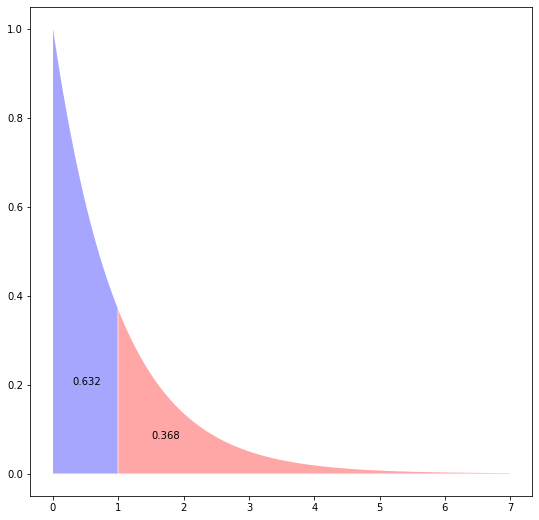

In [29]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)
plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)
plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

#### Generate Poisson data average arrival time 1

In [30]:
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000, mu=1 )

#### Print table of counts

In [31]:
print( pd.crosstab(index="counts", columns= arrival_rate_1))

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3670  3708  1820  600  151  46  5


#### Plot histogram

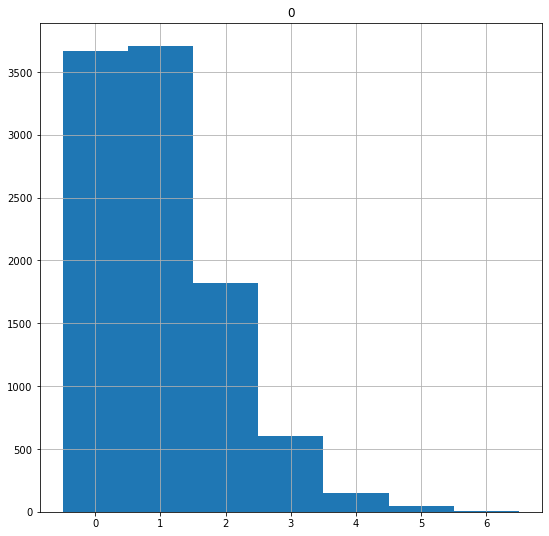

In [32]:
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5), bins=max(arrival_rate_1)+1);

#### Generate Poisson data, average arrival time 10

In [33]:
random.seed(12)
arrival_rate_10 = stats.poisson.rvs(size=10000, mu=10 )

#### Print table of counts

In [34]:
print( pd.crosstab(index="counts", columns= arrival_rate_10))

col_0   1   2   3    4    5    6    7     8     9     10  ...   15   16   17  \
row_0                                                     ...                  
counts   7  28  70  179  391  638  912  1135  1228  1281  ...  340  206  123   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  73  38  26   7   7   2   3  

[1 rows x 24 columns]


#### Plot histogram

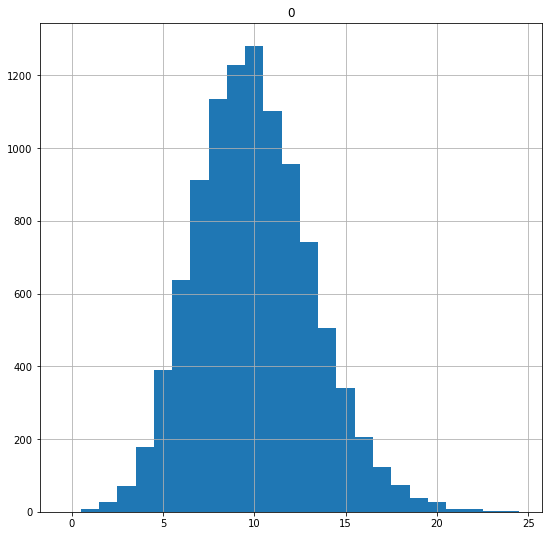

In [35]:
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5), bins=max(arrival_rate_10)+1);

#### Check the probability of 5 arrivals or less with arrival rate 10

In [36]:
stats.poisson.cdf(k=5, mu=10)  

0.06708596287903189

#### Check the prob f exactly 10 arrivals with arrival rate 10

In [37]:
stats.poisson.pmf(k=10, mu=10)

0.12511003572113372